<a href="https://colab.research.google.com/github/BigSekas/WB_mirea/blob/main/Workbook3_Mironov_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1.3.1**

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


1 точка: 0 0 0
2 точка: 1 1 1
3 точка: 2 2 2
4 точка: 3 3 3


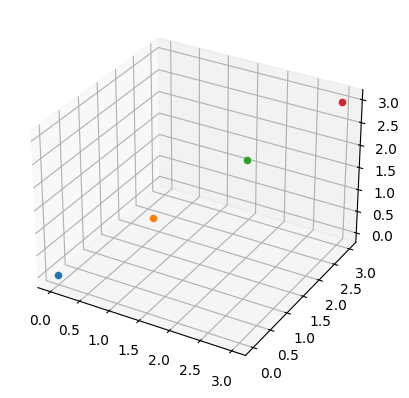

Евклидово расстояние попарно между всеми точками: 
Расстояние между 2 и 1 точками = 1.7320508075688772
Расстояние между 3 и 1 точками = 3.4641016151377544
Расстояние между 3 и 2 точками = 1.7320508075688772
Расстояние между 4 и 1 точками = 5.196152422706632
Расстояние между 4 и 2 точками = 3.4641016151377544
Расстояние между 4 и 3 точками = 1.7320508075688772
Квадрат евклидова расстояния попарно между всеми точками: 
Расстояние между 2 и 1 точками = 2.9999999999999996
Расстояние между 3 и 1 точками = 11.999999999999998
Расстояние между 3 и 2 точками = 2.9999999999999996
Расстояние между 4 и 1 точками = 27.0
Расстояние между 4 и 2 точками = 11.999999999999998
Расстояние между 4 и 3 точками = 2.9999999999999996
Квадрат расстояния Чебышева попарно между всеми точками: 
Расстояние между 2 и 1 точками = 1.0
Расстояние между 3 и 1 точками = 2.0
Расстояние между 3 и 2 точками = 1.0
Расстояние между 4 и 1 точками = 3.0
Расстояние между 4 и 2 точками = 2.0
Расстояние между 4 и 3 точками = 1.0
К

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


points = []
for i in range(4):
    x, y, z = map(int, input(f"{i+1} точка: ").split())
    points.append(np.array((x, y, z)))
    ax.scatter(x, y, z)

plt.show()

#evk_distance
print("Евклидово расстояние попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j]))


print("Квадрат евклидова расстояния попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j])**2)


print("Квадрат расстояния Чебышева попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j], ord = np.inf))


print("Квадрат расстояния Хемминга попарно между всеми точками: ")
for i in range(4):
    for j in range(i):
        print(f"Расстояние между {i + 1} и {j + 1} точками =", np.linalg.norm(points[i] - points[j], ord = 1))

**Задание 1.3.2**

Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [2]:
main_matr = np.zeros((5, 5))
main_matr = main_matr + np.arange(5)
print(*main_matr, sep = '\n')

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


**Задание 2.3.1**

Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


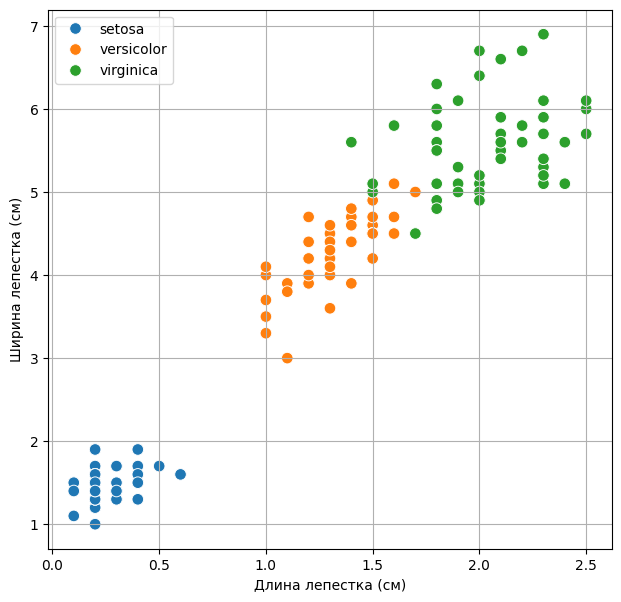

In [4]:
plt.figure(figsize = (16, 7))

plt.subplot(121)
sns.scatterplot(
    data = iris,
    x = 'petal_width', y = 'petal_length',
    hue = 'species',
    s = 70
)

plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend()
plt.grid()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()

model = KNeighborsClassifier(n_neighbors = 10) #n_neighbors = 1
                                               #n_neighbors = 5
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa'], dtype=object)

accuracy:  0.957


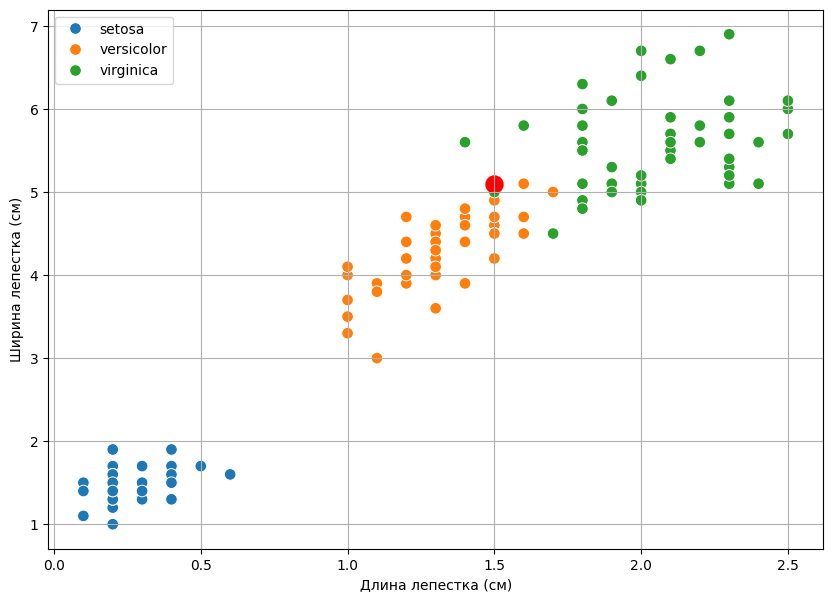

In [10]:
from sklearn.metrics import accuracy_score
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'petal_width', y = 'petal_length', data = iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend(loc = 2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)

print(f'accuracy:  {accuracy_score(y_test, y_pred) :.3}')

```
При n = 1 алгоритм неустойчив к шумовым выбросам: он дает ошибочные
классификации не только на самих объектах-выбросах, но и на ближайших
к ним объектах других классов. Если же количество соседей n = j (размерности выборки),
алгоритм достаточно устойчив.

Оптимизация чистоты алгоритма:
Как правило объекты не являются равноценными, и среди нихх могут находиться
эталонные объекты. Это такие объекты, что если классифицируемый объект близок к ним,
то, скорее всего, принадлежит тому же классу эталонных объектов.
Также существуют неинформативные элементы, такие элементы можно безболезненно выбросить.

На сверхбольших выборках, когда количество соседей k >> j (размерности выборки),
перечисленные выше особенности помогут оптимизировать алгоритм, а именно
хранение всех обучающих объектов (так как он хранит их всех)
```


In [8]:
import pandas as pd

dataframe = pd.DataFrame({"оценка": ["низкая", "низкая", "средняя", "средняя", "высокая"]})
scale_mapper = {"низкая":1, "средняя":2, "высокая":3}

dataframe["оценка"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

**Задание 3.3.2**

Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [9]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"красный" : 1, "синий": 4},
            {"красный" : 3, "синий": 3},
             {"красный" : 4, "зеленый": 3},
             {"красный" : 1, "зеленый": 3}]

dictvectorizer = DictVectorizer(sparse = False)
features = dictvectorizer.fit_transform(data_dict)
print(*features, sep = '\n')

[0. 1. 4.]
[0. 3. 3.]
[3. 4. 0.]
[3. 1. 0.]
